Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

# 1.0 **BUSINESS UNDERSTANDING**

### 1.1 **BUSINESS OVERVIEW**

A telecom business involves the development, ownership or operation of telecommunication systems and services such as mobile communication, fixed-line services, and internet provision to a wide range of customers. Over the years, the telecom business has evolved rapidly because of technology shifts such as adoption of 5G networks, customer expectations, and stiff competition in the field.It can operate in diverse sectors, from software and e-commerce to fintech and biotechnology, but they are all united by a reliance on digital infrastructure and a data-driven approach.The business is often faced by challenges such as customer churn where the clients cancel subscriptions and move to competitors or even fraud cases such as unusual data activities in their sysytems. Due to intense competition in the sector, potential loopholes should be handled with utmost importance and consider decision making based on data-driven insights.

### 1.2 **PROBLEM STATEMENT**

In telecommunication companies such as SyriaTel, customer churn poses a significant risk to the company’s revenue and market position in a highly competitive sector. Retaining customers and maintaining high levels of satisfaction is crucial, as users often shift to alternative service providers that offer better service. The problem is that without understanding why customers leave, SyriaTel risks losing both users and revenue. This is because the company cannot effectively track and interpret customer behavior, which in turn prevents timely intervention. This project aims to lower the trend in revenue loss due to customer churn, where customers cancel or fail to renew subscriptions and switch to competitors. To address this issue, the company wants to utilize customer data and come up with data-driven insights that support better customer retention, reduce revenue loss, and enhance long-term business 

### 1.3 **BUSINESS OBJECTIVES**

#### 1.3.1 **MAIN OBJECTIVE.**

The main objective of this project is to help SyriaTel, a telecommunication company, reduce revenue loss caused by customer churn by developing a predictive model that identifies customers who are most likely to leave.

#### 1.3.2 **SPECIFIC OBJECTIVES**

1. Explore the cutomer data to identify trends and patterns that influence churn.
2. Preprocess the data by handling missing values, encoding categorical features and create new features with respect to customer behavior.
3. Build and train diffent classification models that will predict customer churn.
4. Evaluate the model perfomance.
5. Identify the most significant features that will provide actionable insights with respect to churn.
6. Provide recommendations to stakeholders for customer retention strategies.

#### 1.3.2 **RESEARCH QUESTIONS**

1. What are the key factors that influence churn at SyrilTel?
2. Which classification model perfoms best to predict customer churn likelihood?
3. How do customer usage habits, billing trends, and service experiences compare between churners and non-churners?
4. Which strategies can be adopted by the company based on findings, to reduce churn and improve customer retention?

### 1.3 **SUCCESS CRITERIA**

To build a classification model that:
- Predicts whether a customer is likely to stay or churn.
- Provides interpretable insights into the key factors influencing churn, to support customer retention strategies.

# 2.0 **DATA UNDERSTANDING**

- The dataset was sourced from Kaggle. (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)
- It consists of 3333 records and 21 fields.
- The dataset consists of float, integer, boolean, and object data types.
- The dataset contains information on customer data across different states, including their usage behavior, subscription plans, and churn status.
- The column names are:
   1. **State**   -state where the customer resides             
   2. **Account length**   -Period the customer has had the account for.      
   3. **Area code**      -Telephone area code of the customer
   4. **Phone number**      -   Customer's telephone number
   5. **International plan**     -Whether the customer has an international calling plan (yes/no)
   6. **Voice mail plan**       -Whether the customer has a voice mail plan (yes/no)
   7. **Number vmail messages**   -Number of voicemail messages sent or received
   8. **Total day minutes**    -  Total minutes of calls made during the day
   9. **Total day calls**   -     Total number of calls made during the day
   10. **Total day charge**    - Total charges for daytime calls
   11. **Total eve minutes**-Total minutes of calls made during the evening
   12. **Total eve  calls** -Total number of calls made during the evening
   13. **Total eve charge**     -Total charges for evening calls
   14. **Total night minutes**     -Total minutes of calls made during the night
   15. **Total night calls**   -Total number of calls made during the night
   16. **Total night charge**     -Total charges for night calls
   17. **Total intl minutes**   -Total minutes spent on international calls.-
   18. **Total intl calls**    -Total number of international calls.
   19. **Total intl charge**  -   Total cost charged for international calls.
   20. **Customer service calls**-Number of times the customer called customer service.
   21. **Churn**   -Whether the customer left the company             

# 3.0 **DATA PREPARATION**

In [1]:
import pandas as pd   #for data manipulation and analysis.
import numpy as np    #for numeric and scientific computing

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\bigml_59c28831336c6604c800002a.csv")  #load the dataset
df.head() #preview the dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()  #Gives an overview of the dataframe's structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()    #Gives a statistical summary of the dataframe.(Focuses on numerical columns)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.isna().sum() #Check for missing values.

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.duplicated().sum() #Check for duplicates.

0

In [7]:
df['phone number']=df['phone number'].str.replace(r'[^\d]','',regex=True) #This replaces all non-digits in the phone number column.

In [8]:
df['churn']=df['churn'].astype(int) #This converts the column from 'boolean' data type to 'int' for better model interpretation.

In [9]:
df=df.drop(columns=['state','area code','phone number'],axis=1) #drop 'irrelevant' columns.They only identify the customer and have no predictive power.

In [10]:
df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# 4.0 **DATA ANALYSIS**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df1=df.copy()
df1

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [13]:
corr=df1.corr(numeric_only=True)[['churn']].sort_values(by='churn',ascending=False) #correlation between the target variable('churn') and the predictive features.
corr

,churn
churn,1.000000
customer service calls,0.208750
total day minutes,0.205151
total day charge,0.205151
total eve minutes,0.092796
total eve charge,0.092786
total intl charge,0.068259
total intl minutes,0.068239
total night charge,0.035496
total night minutes,0.035493


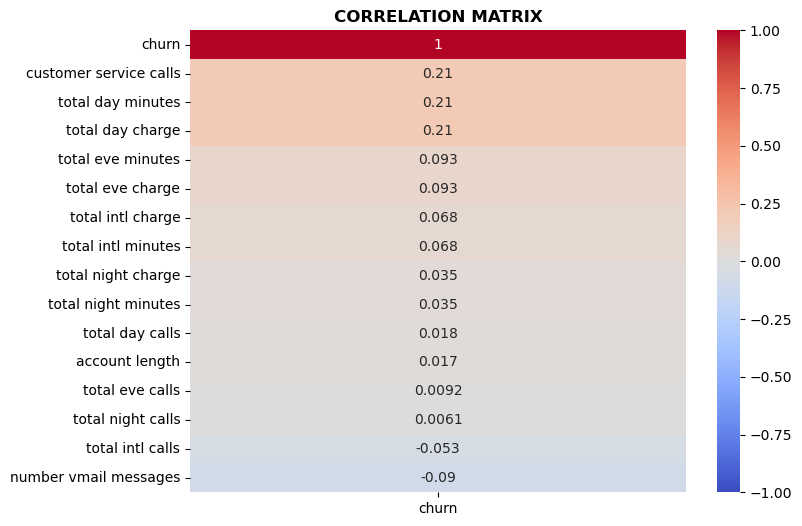

In [14]:
#Plotting the correlation matrix.
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.title('CORRELATION MATRIX',fontweight='bold')
plt.show()

- From the correlation  matrix above, it is clear that charges and minutes columns are redundant because of similar correlation with each other. Churn interprets them as similar information.
- From this inference, we drop the minutes columns and analyse user data based on billing rather than usage time.

In [15]:
#create new minutes and charges columns, each containing the total 
df1['Total_minutes']=(df1['total day minutes']+df1['total eve minutes']+df1['total night minutes']+df1['total intl minutes'])
df1['Total_charges']=(df1['total day charge']+df1['total eve charge']+df1['total night charge']+df1['total intl charge'])
df1

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total_minutes,Total_charges
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8,66.80
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,660.7,60.10
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,585.4,63.53
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,675.6,67.74
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,517.6,57.53


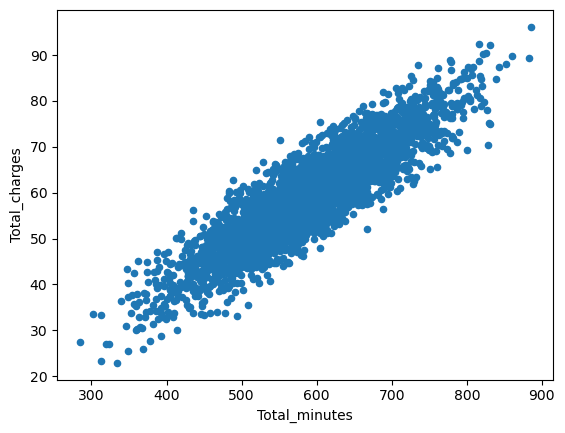

In [16]:
#plot a scatter plot to confirm Linearity of the two variables
df1.plot.scatter('Total_minutes','Total_charges')
plt.show()

- **This confirms the linearity between the two variables.**

In [17]:
#drop all the 'minutes' columns.
df1=df1.drop(columns=['Total_minutes','total day minutes','total eve minutes','total night minutes','total intl minutes'],axis=1)
df1

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,Total_charges
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29
3,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0,60.10
3329,68,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0,63.53
3330,28,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0,67.74
3331,184,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0,57.53


In [18]:
churn_rate=df1['churn'].mean()*100
churn_by_int_plan=round(df1.groupby('international plan')['churn'].mean()*100,2)
churn_by_int_plan

international plan
no     11.50
yes    42.41
Name: churn, dtype: float64

- **Customers subscribed to the international plan show a churn rate of 42.4%, compared to 11.5% for those without it**

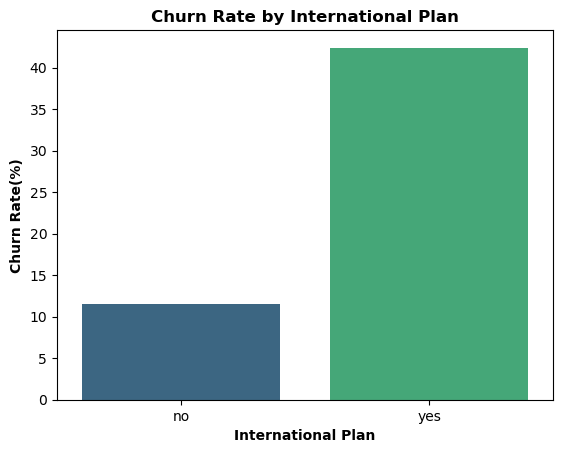

In [19]:
sns.barplot(x=churn_by_int_plan.index, y=churn_by_int_plan.values,palette='viridis')
plt.title('Churn Rate by International Plan', fontweight='bold')
plt.ylabel('Churn Rate(%)',fontweight='bold')
plt.xlabel('International Plan',fontweight='bold');

- **Customers with an international plan are more likely to churn.**

In [20]:
churn_by_plans = df1.groupby(['international plan', 'voice mail plan'])['churn'].mean() * 100
print(churn_by_plans.round(2))


international plan  voice mail plan
no                  no                 13.85
                    yes                 5.30
yes                 no                 43.72
                    yes                39.13
Name: churn, dtype: float64


- **Customers with a voice mail plan have a lower churn rate compared to those without.**
- **This indicates that this additional service 'voicemail' may contribute to higher retention of customers.**
- **Customers with an international plan but with no voice mail plan are likely to leave**

In [21]:
churn_by_customer_service_Calls=round(df.groupby('customer service calls')['churn'].mean()*100,2)
churn_by_customer_service_Calls

customer service calls
0     13.20
1     10.33
2     11.46
3     10.26
4     45.78
5     60.61
6     63.64
7     55.56
8     50.00
9    100.00
Name: churn, dtype: float64

**Churn rates increase with the number of customer service calls.**

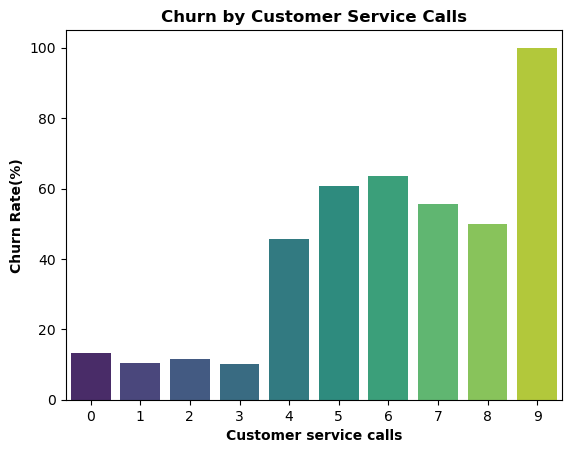

In [22]:
sns.barplot(x=churn_by_customer_service_Calls.index, y=churn_by_customer_service_Calls,palette='viridis')
plt.title('Churn by Customer Service Calls', fontweight='bold')
plt.ylabel('Churn Rate(%)', fontweight='bold')
plt.xlabel('Customer service calls', fontweight='bold');

**Customers that contacted customer servives churned more, indicating a possible dissatisfaction in the services, such as unresolved issues, or long delays in resolving the issues.**

# 5.0 **MODELLING**

In [38]:
from sklearn.linear_model import LogisticRegression   #Imports Logistic Regression model.
from sklearn.model_selection import train_test_split  #Function to split data into training and testing sets.
import statsmodels.api as sm                          #Statsmodels library for advanced statistical modeling and summaries.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
df1

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,Total_charges
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29
3,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0,60.10
3329,68,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0,63.53
3330,28,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0,67.74
3331,184,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0,57.53


In [25]:
#Select the target and predictive features.
y=df1['churn']
X=df1.drop(['churn','account length'],axis=1)

In [26]:
y.value_counts() #This check for class imbalance in our target variable.

churn
0    2850
1     483
Name: count, dtype: int64

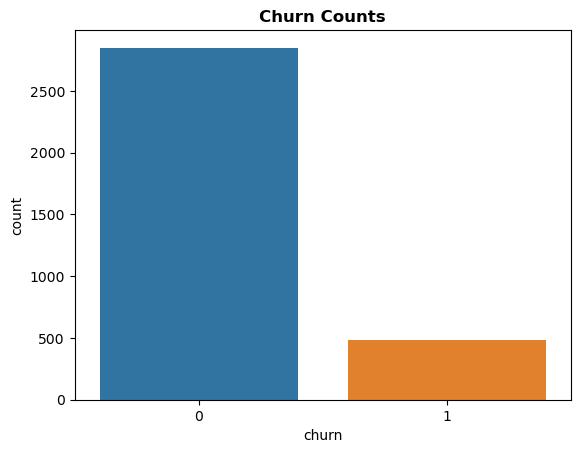

In [27]:
#Visualize the class balance.
sns.countplot(x='churn', data=df1)  #plots a countplot
plt.title("Churn Counts",fontweight='bold')
plt.xticks()
plt.show()

In [28]:
#split data into train and test data.
#The 'stratify' parameter ensures there is a class balance between train and test sets.
#70% of data goes to train set, 30% to test set.
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### **PREPROCESS THE DATA**

In [29]:
#Some data preprocessing steps such as encoding and feature scaling occur in this step and not the previous one(Data preparation)
#to prevent data leakage where information outside training data leaks into the model during training, inflating the model perfomance.

In [30]:
categorical_columns=X.select_dtypes(include='object').columns
numeric_columns=X.select_dtypes(include=['float64','int64']).columns

In [31]:
#encoding categorical variables.
from sklearn.preprocessing import OneHotEncoder                                            # import the OneHotEncoder library
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False, dtype='int')      # Initializes the encoder
categorical_cols = ['international plan', 'voice mail plan']                               # Categorical column names
encoded_train = ohe.fit_transform(X_train[categorical_cols])                               # Fit and transform on train
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)                        # Get new column names
df_encoded_train = pd.DataFrame(encoded_train, columns=encoded_feature_names, index=X_train.index)  # Convert encoded array into DataFrame
X_train_enc = pd.concat([X_train.drop(columns=categorical_cols), df_encoded_train], axis=1) # Merge encoded features with original dataset
encoded_test = ohe.transform(X_test[categorical_cols])                                     # Transform test using same encoder
df_encoded_test = pd.DataFrame(encoded_test, columns=encoded_feature_names, index=X_test.index)    # Convert encoded array into DataFrame
X_test_enc = pd.concat([X_test.drop(columns=categorical_cols), df_encoded_test], axis=1)   # Merge encoded features with original dataset

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_enc)
X_test_scaled=scaler.transform(X_test_enc)

In [35]:
#This gives a statistical summary of the features.
X_train_enc = sm.add_constant(X_train_enc)
model = sm.Logit(y_train, X_train_enc)
results = model.fit()
results.summary()

         Current function value: 0.324380
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2319
Method:                           MLE   Df Model:                           13
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                  0.2159
Time:                        15:43:27   Log-Likelihood:                -756.78
converged:                      False   LL-Null:                       -965.21
Covariance Type:            nonrobust   LLR p-value:                 6.118e-81
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.1138      0.841     -9.650      0.000      -9.762      -6.466
number vmail messages      0.0417      0.021      1.942      0.052      -0.000       0.084
total day calls            0.0029      0.003      0.883      0.377      -0.004       0.009
total day charge          -0.0440   5.61e+04  -7.85e-07      1.000    -1.1e+05     1.1e+05
total eve calls            0.0030      0.003      0.896      0.370      -0.004       0.009
total eve charge          -0.0306   5.61e+04  -5.45e-07      1.000    -1.1e+05     1.1e+05
total night calls          0.0005      0.003      0.149      0.881      -0.006       0.007
total night charge        -0.0489   5.61e+04  -8.71e-07      1.000    -1.1e+05     1.1e+05
total intl calls          -0.1469      0.032     -4.654      0.000      -0.209      -0.085
total intl charge          0.2368   5.61e+04   4.22e-06      1.000    -1.1e+05     1.1e+05
customer service calls     0.5357      0.048     11.216      0.000       0.442       0.629
Total_charges              0.1131   5.61e+04   2.02e-06      1.000    -1.1e+05     1.1e+05
international plan_yes     2.0542      0.177     11.630      0.000       1.708       2.400
voice mail plan_yes       -2.1905      0.684     -3.200      0.001      -3.532      -0.849
==========================================================================================
"""

In [54]:
logreg=LogisticRegression(solver='liblinear',max_iter=1000)  #Initialize Logistic Regression model
logreg.fit(X_train_scaled,y_train)                           #Fit model on train set
y_pred = logreg.predict(X_test_scaled)                       #Predict churn on test set

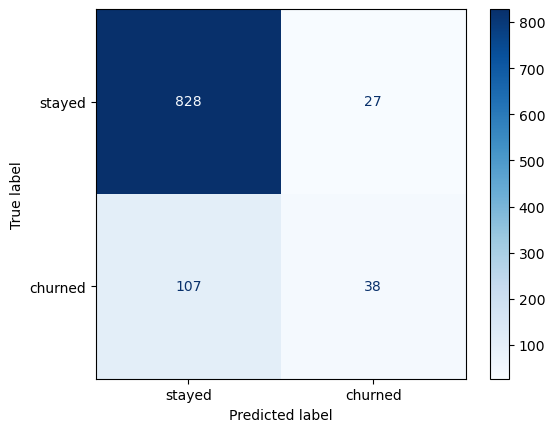

In [53]:
#plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay #import library
cfm=confusion_matrix(y_test,y_pred)                #
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Blues');

- **The model has 828 True negatives meaning it correctly predicted 828 non-churners**
- **The model has 38 True positives meaning it correctly predicts 38 churners**
- **The model has 107 False negatives meaning model wrongly classified 107 churners as non-churners**
- **The model has 27 True negatives meaning it wrongly classified  27 non-churners as churners**

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.58      0.26      0.36       145

    accuracy                           0.87      1000
   macro avg       0.74      0.62      0.64      1000
weighted avg       0.84      0.87      0.84      1000


Confusion Matrix:
 [[828  27]
 [107  38]]


- **The model has an accuracy of about 87% meaning it correctly predicts churn for 87% of users in the dataset**
- **Precision for class 0(non-churners: Model is correct 89% of the times it predicts non-churners)**
- **Recall for class 0 (non-churners): Model captures 97%  of actual non-churners**
- **Precision for class 1 (churners: Model is correct 58% of the times it predicts churners)**
- **Recall for class 1 (churners): Model captures 26%  of actual churners**
- **F1-score for churners (0.36) is significantly low which indicates a poor balance between recall and precision**

From above inferences, it is concluded that the model is biased towards the majority class likely due to class imbalance.

In [60]:
#We'll try and balance the model with class weights in logistic regression.
logreg=LogisticRegression(class_weight='balanced',solver='liblinear',max_iter=1000)  #Initialize Logistic Regression model
logreg.fit(X_train_scaled,y_train)                                                   #Fit model on train set
y_pred = logreg.predict(X_test_scaled)                                               #Predict churn on test set

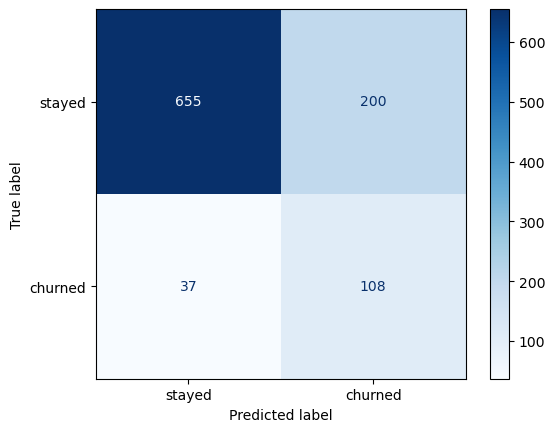

In [58]:
#plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay #import library
cfm=confusion_matrix(y_test,y_pred)                #
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Blues');

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.763

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       855
           1       0.35      0.74      0.48       145

    accuracy                           0.76      1000
   macro avg       0.65      0.76      0.66      1000
weighted avg       0.86      0.76      0.79      1000


Confusion Matrix:
 [[655 200]
 [ 37 108]]


- **The model has an accuarcy of about 76% meaning it correctly predicts churn for 76% of users in the dataset. This is slightly lower than the unbalanced model since it takes the churners class more seriously**
- **Precision for class 0(non-churners: Model is correct 95% of the times it predicts non-churners)**
- **Recall for class 0 (non-churners): Model captures 77%  of actual non-churners**
- **Precision for class 1 (churners: Model is correct 35% of the times it predicts churners)**
- **Recall for class 1 (churners): Model captures 74%  of actual churners**

- Recall for churn shifted from 0.26 to 0.74, meaning the model catches most churner but with more false positives.
- This trade-off is acceptable in this churn analysis because missing a churner is expensive than wrongly flagging a loyal customer.

**From this analysis, we decide to keep the Logistic regression as our baseline model, as we shift to a new model to test whether perfomance will improve.**